442 10


Text(0,0.5,'Prediction')

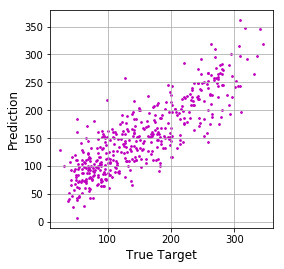

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))
N, p = X.shape
print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c='m', s=3)
ax.grid(True)
ax.set_title("Implementation", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)